In [1]:
import pandas as pd
import numpy as np

def col_fixer(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y")
mytimeparser = lambda x: pd.time.strftime(x, "%H:%M:%S")
df=pd.read_csv('~/Downloads/household_power_consumption.txt',sep=";",low_memory=False,converters=dict(Date=mydateparser,Global_active_power=col_fixer,Global_reactive_power=col_fixer,Voltage=col_fixer,Global_intensity=col_fixer,Sub_metering_1=col_fixer,Sub_metering_2=col_fixer,Sub_metering_3=col_fixer))
#energy consumed but not measured
#(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)

df['unmeasured_metering'] = df['Global_active_power']*1000/60 -df['Sub_metering_1']-df['Sub_metering_2']-df['Sub_metering_3']
#print(df['Global_active_power'])
print('column wise null percentage')
print(df.isnull().mean(axis=0)*100)
print(df.head(10))
print(df.info())

column wise null percentage
Date                     0.000000
Time                     0.000000
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
unmeasured_metering      1.251844
dtype: float64
        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   
5 2006-12-16  17:29:00                3.520                  0.522   235.02   
6 2006-12-16  17:30:00                3.702                  0.5

In [2]:
#time relation of all variables
import matplotlib.pyplot as plt
f, axs = plt.subplots(8,1,figsize=(25,45))
df.groupby('Date').mean().plot(subplots=True, ax=axs)

plt.show()

<Figure size 2500x4500 with 8 Axes>

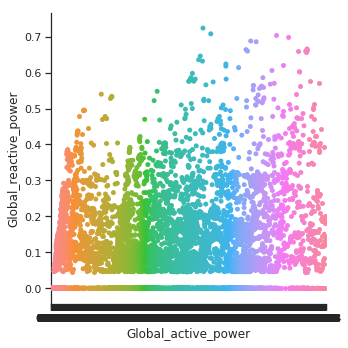

In [3]:
#not of much use
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

#print(len(df['Time'].unique()))
sns.catplot(x="Global_active_power", y="Global_reactive_power", data=df.head(10000));
#help(df.plot)
plt.show()

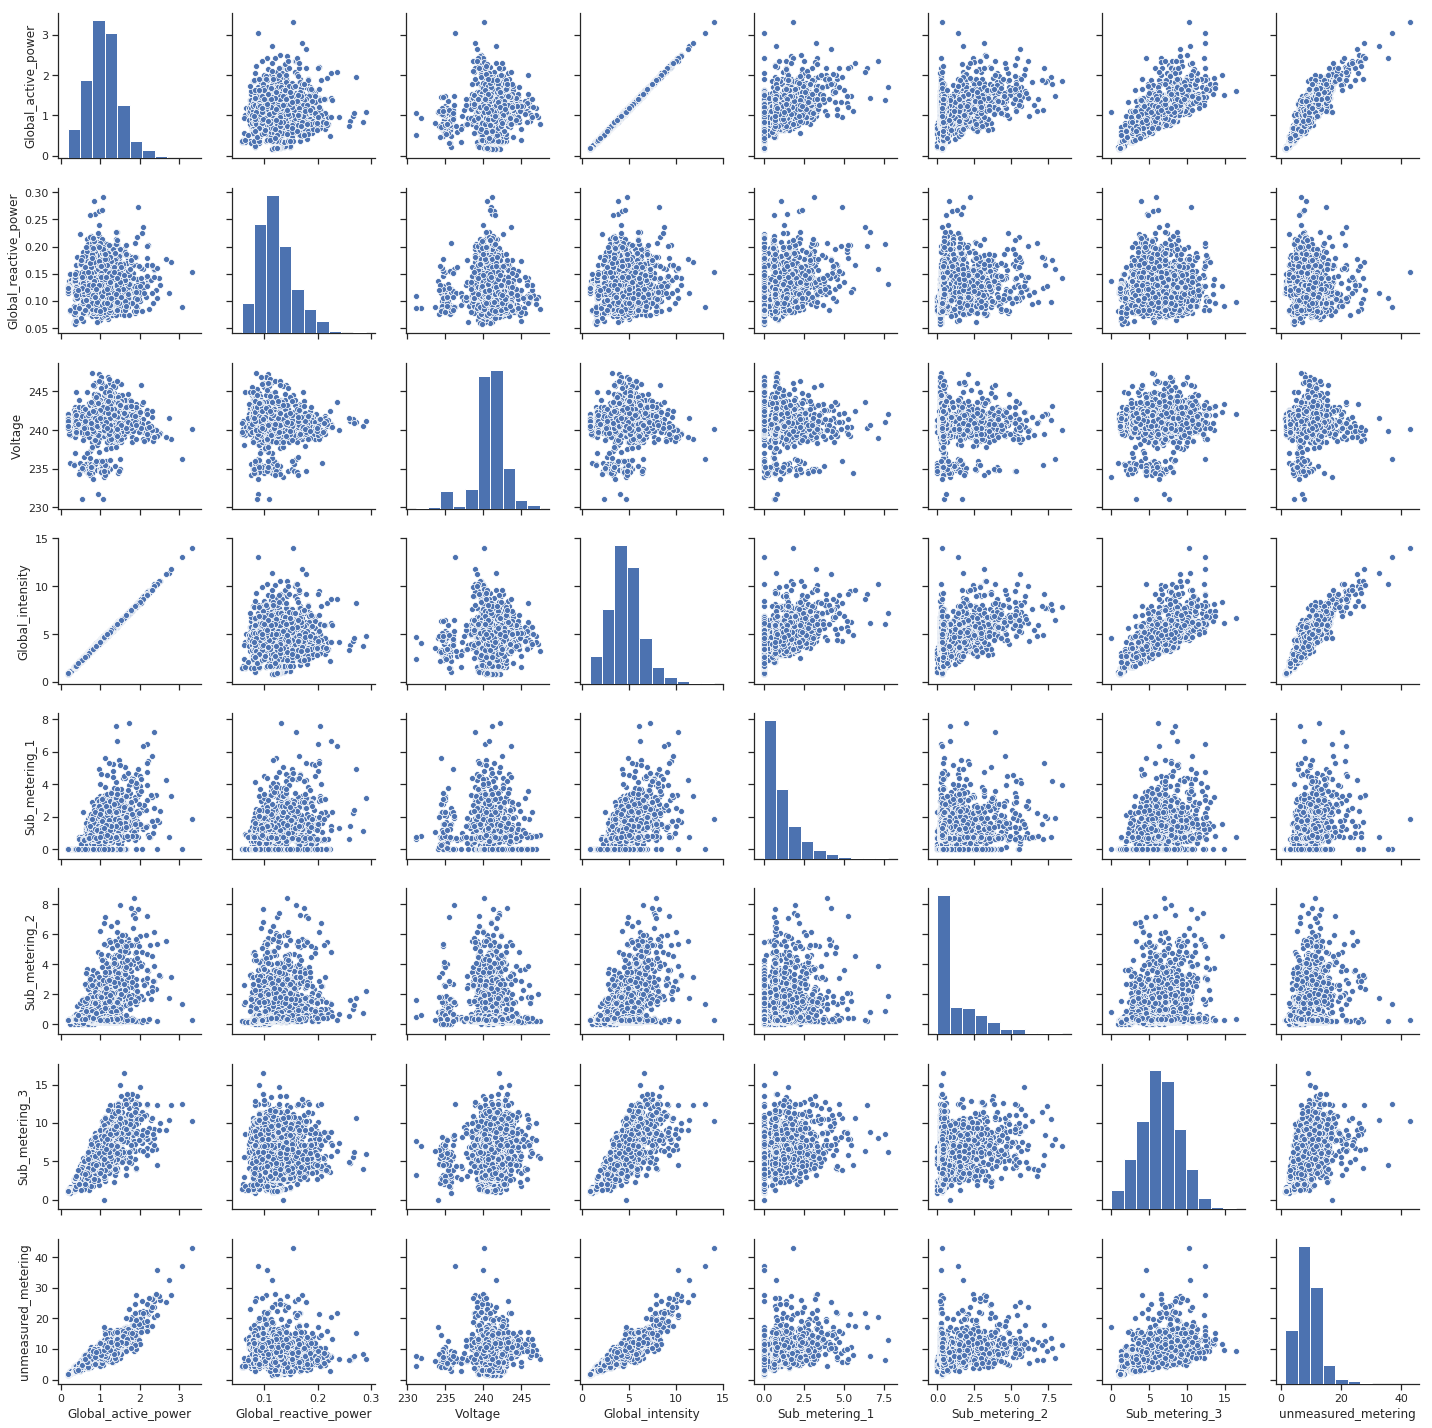

In [4]:
#imp plot of all variables with each other

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

grouped_df=df.groupby('Date').mean().dropna()
sns.pairplot(grouped_df)

plt.show()

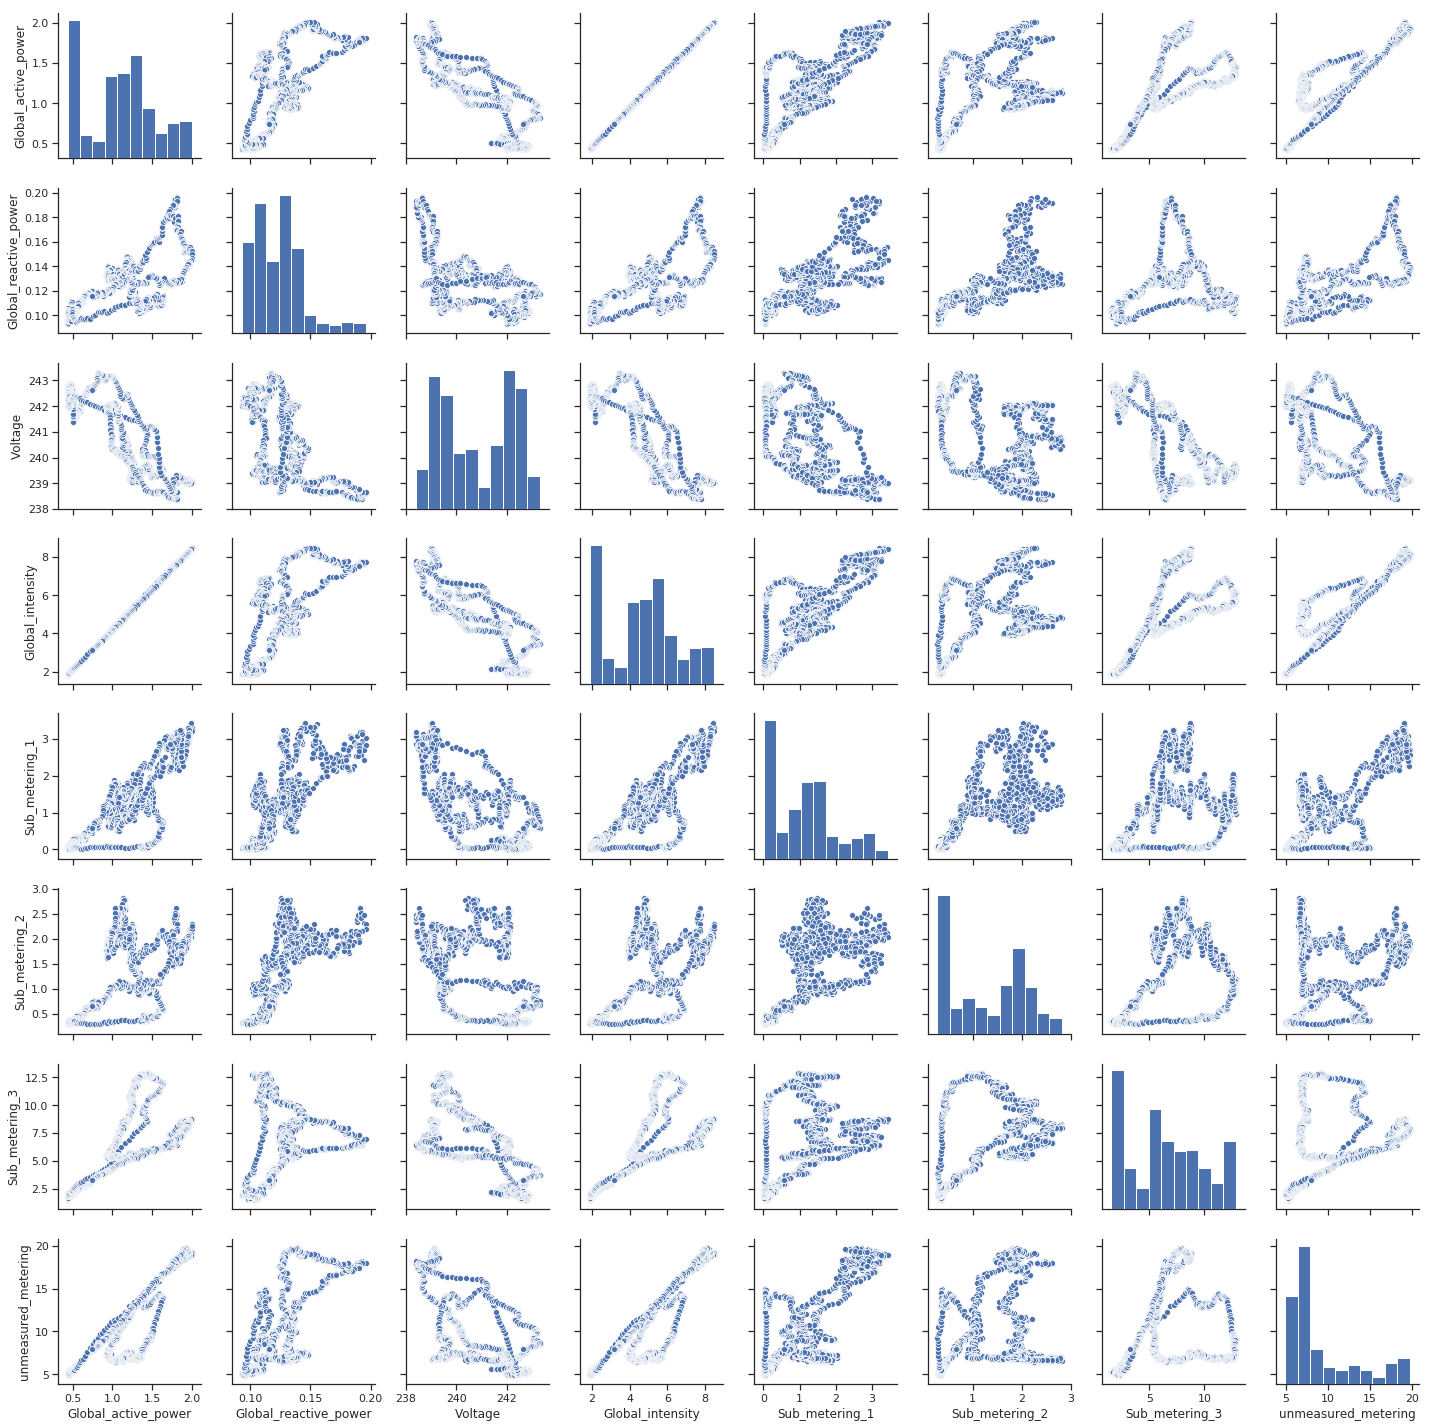

In [5]:
#imp plot of all variables with each other

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

grouped_df=df.groupby('Time').mean().dropna()
#print(grouped_df.Sub_metering_3.unique())
sns.pairplot(grouped_df)


plt.show()

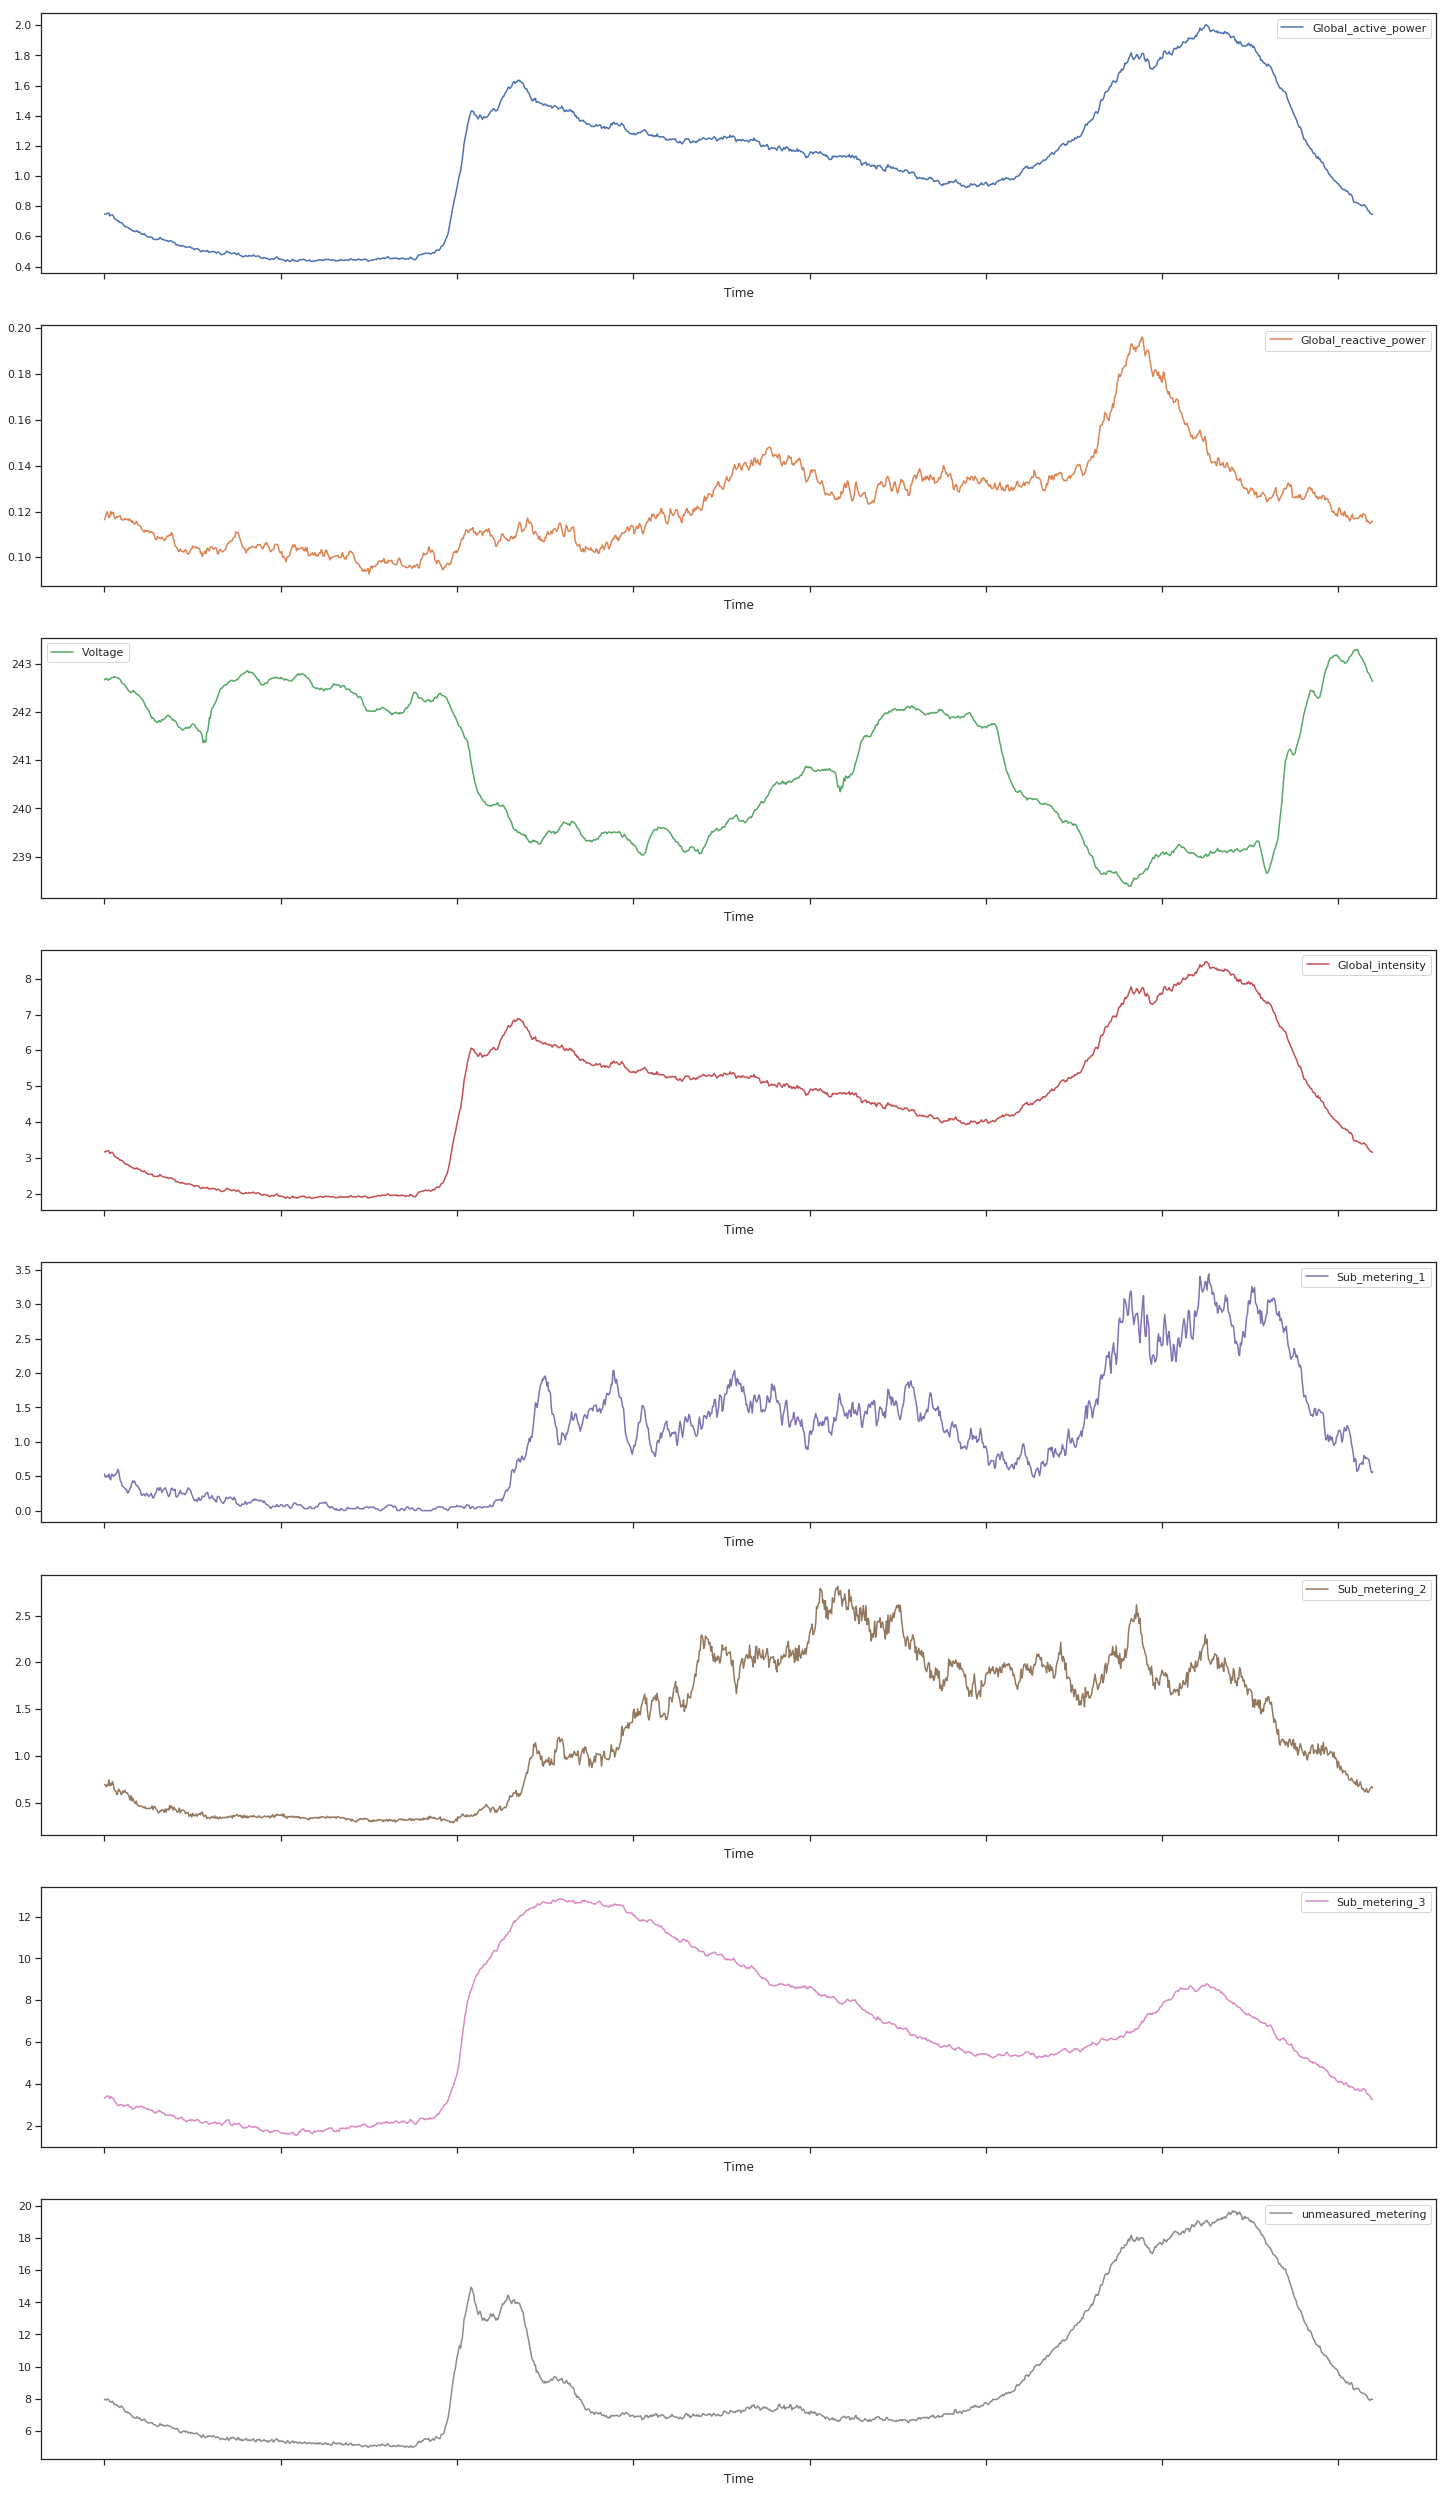

In [6]:
#change of variables with time

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


grouped_df=df.groupby('Time').mean().dropna()
#print(grouped_df.Sub_metering_3.unique())
#print(grouped_df.columns)
f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

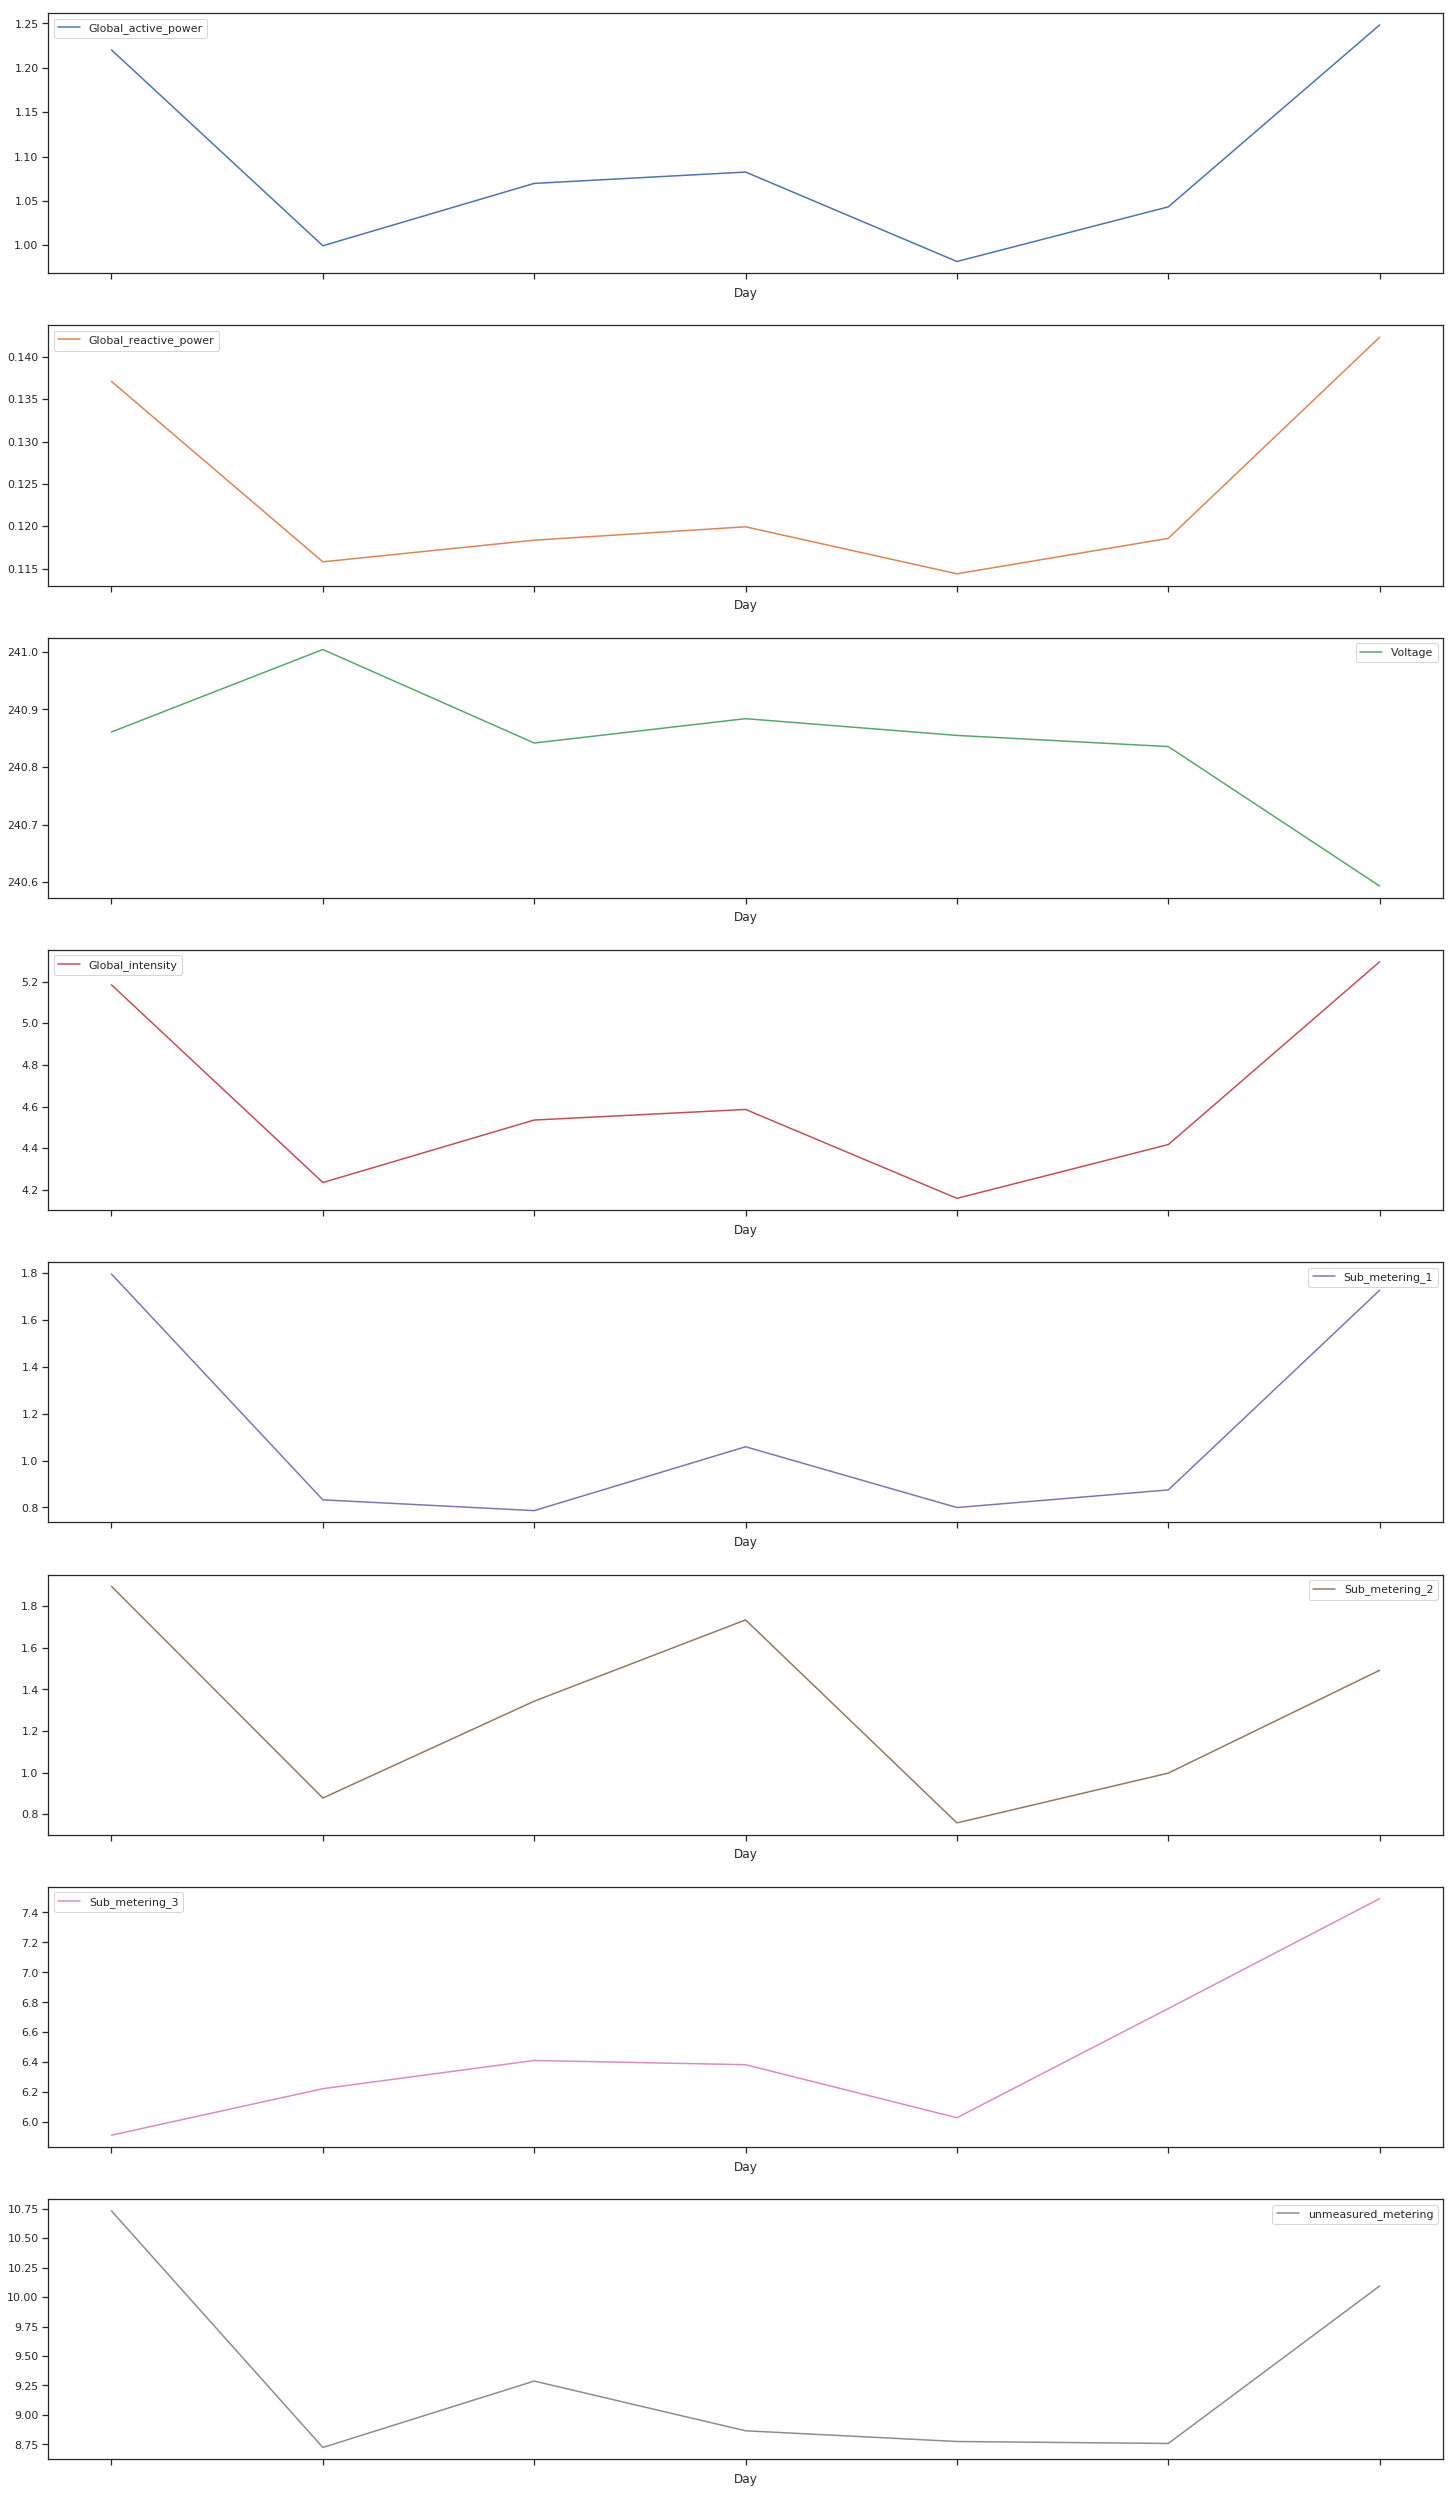

In [7]:
#change of variables with day

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

df['Day'] = df['Date'].dt.day_name()
df['Day_id'] = df['Day'].map(sorterIndex)

#print(df.head(20))

grouped_df=df.groupby('Day').mean().dropna()
grouped_df.sort_values('Day_id', inplace=True)
#dropping the column after sorting
grouped_df.drop(['Day_id'],axis=1,inplace=True)
#print(grouped_df.Sub_metering_3.unique())

f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

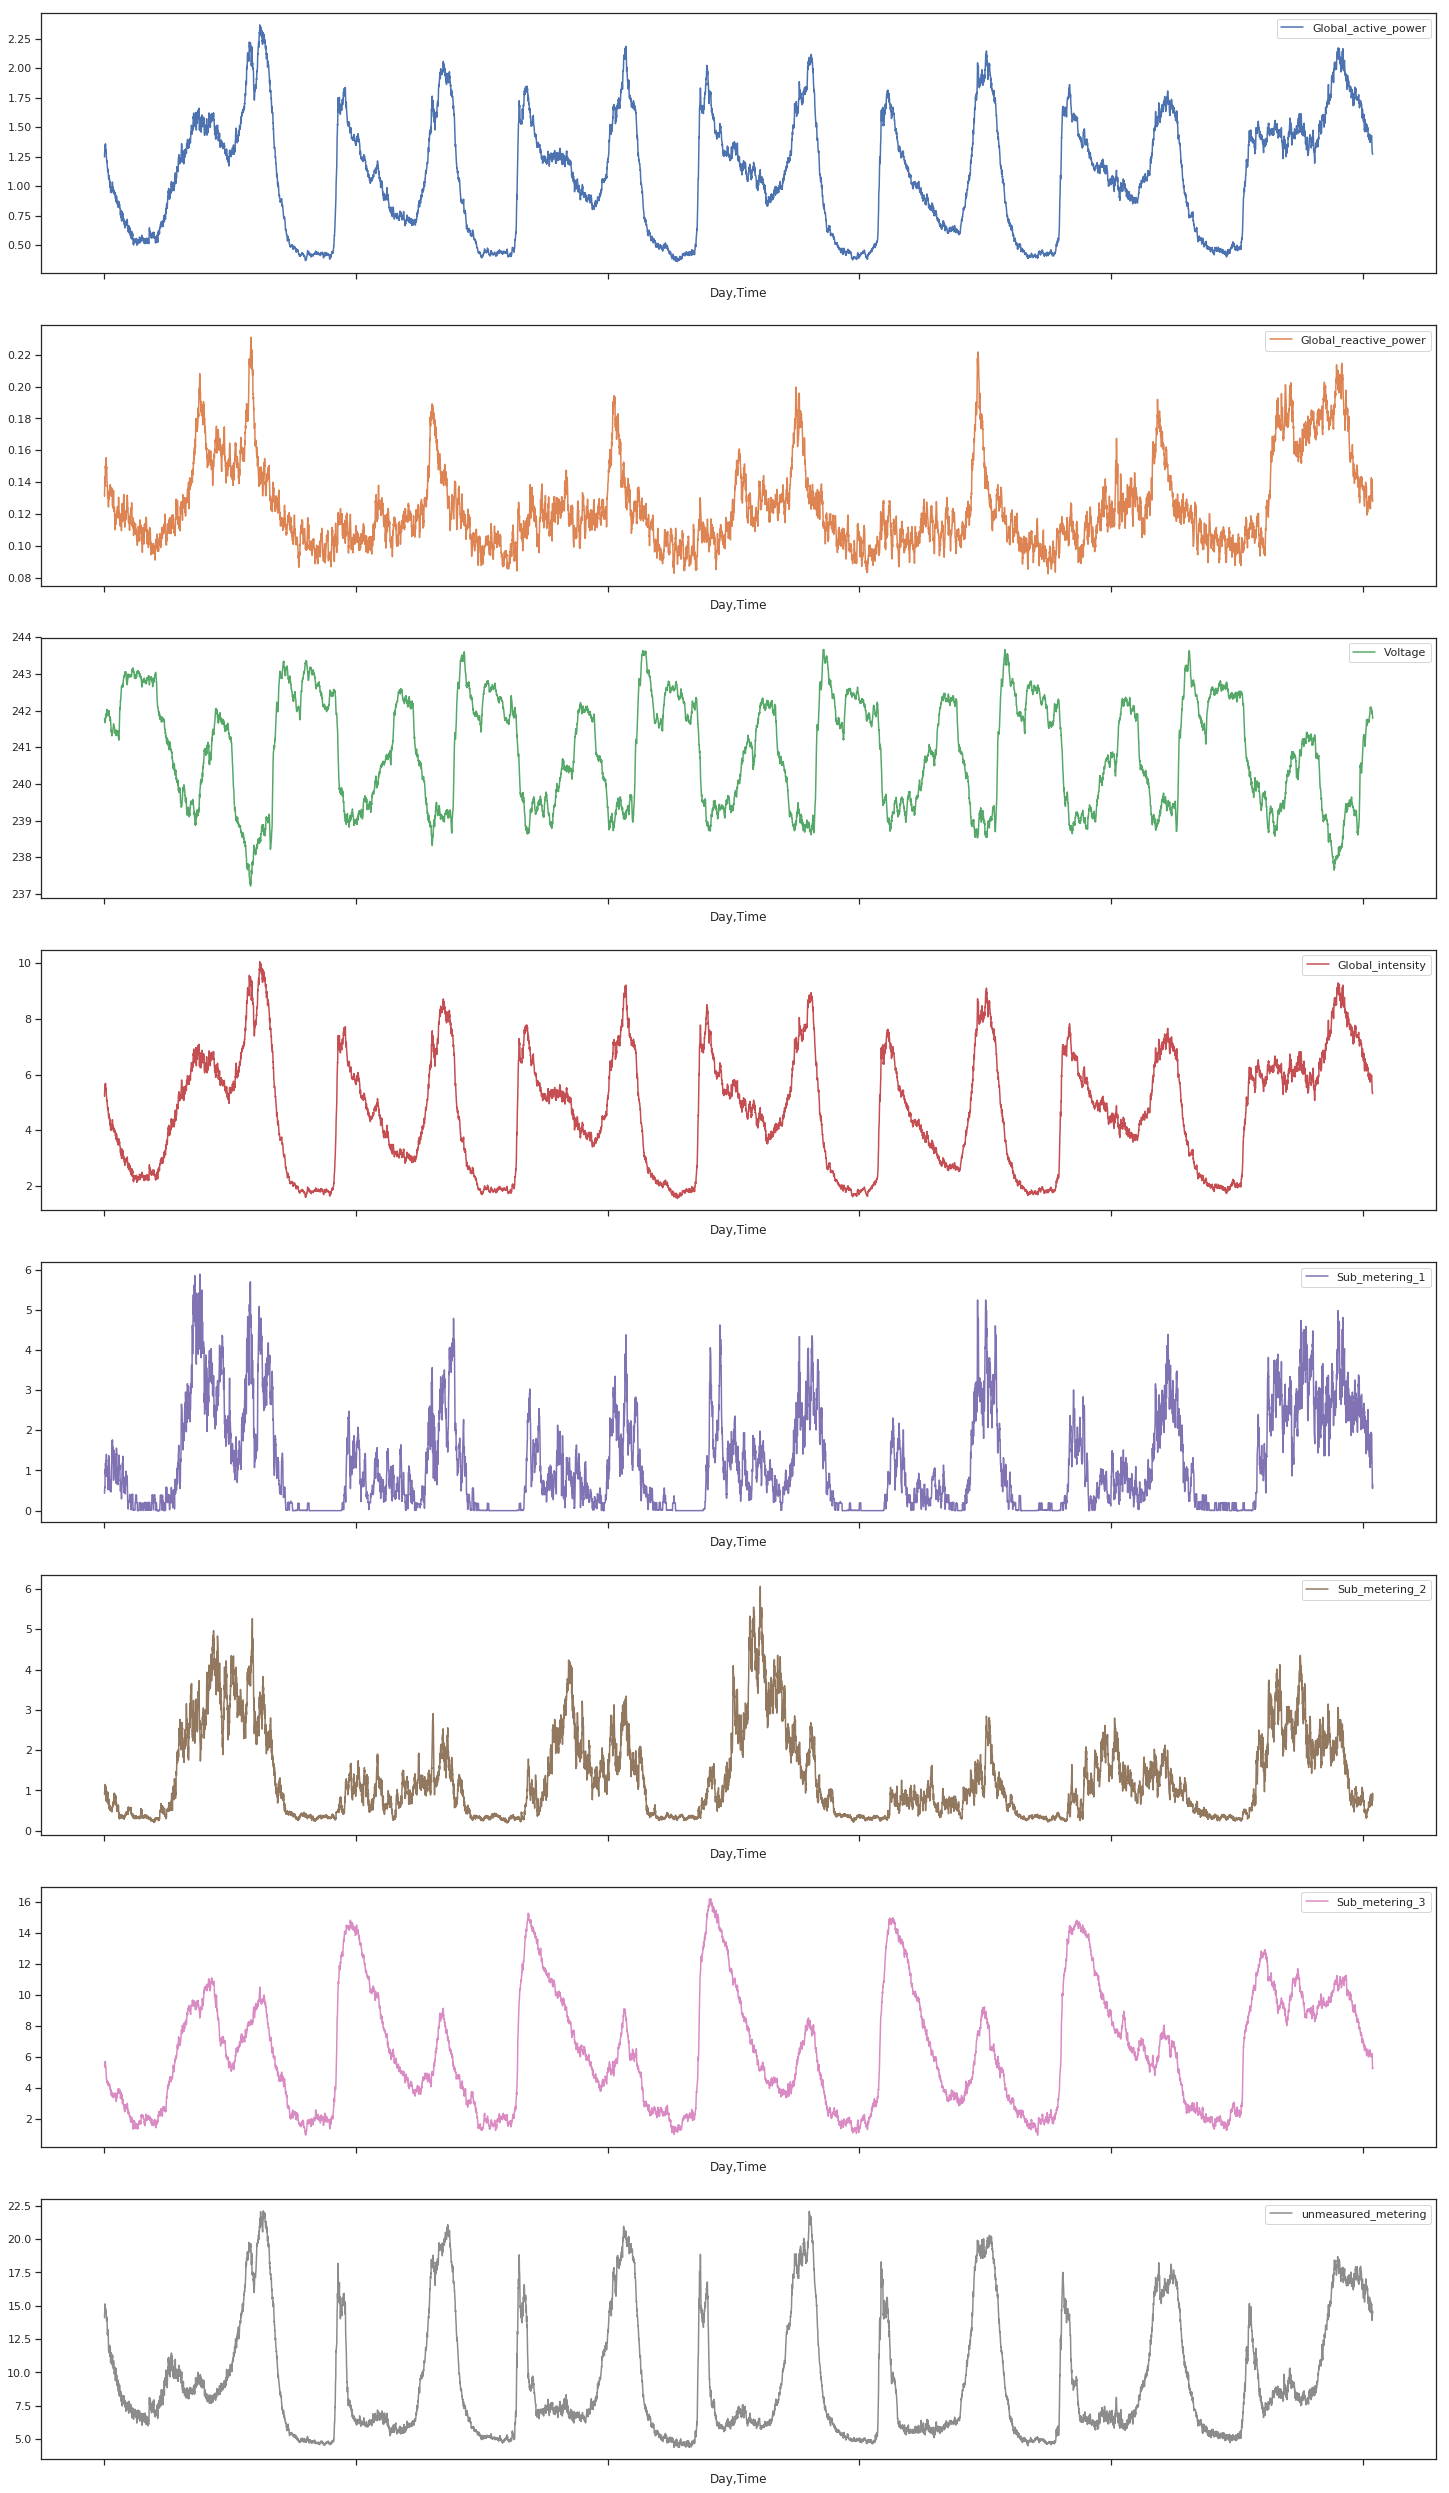

In [8]:
#make daywise graph of columns with time

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

df['Day'] = df['Date'].dt.day_name()
df['Day_id'] = df['Day'].map(sorterIndex)

grouped_df=df.groupby(['Day','Time']).mean().dropna()
grouped_df.sort_values(['Day_id','Time'],inplace=True)
grouped_df.drop(['Day_id'],axis=1,inplace=True)


f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
#print(grouped_df.head(100))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

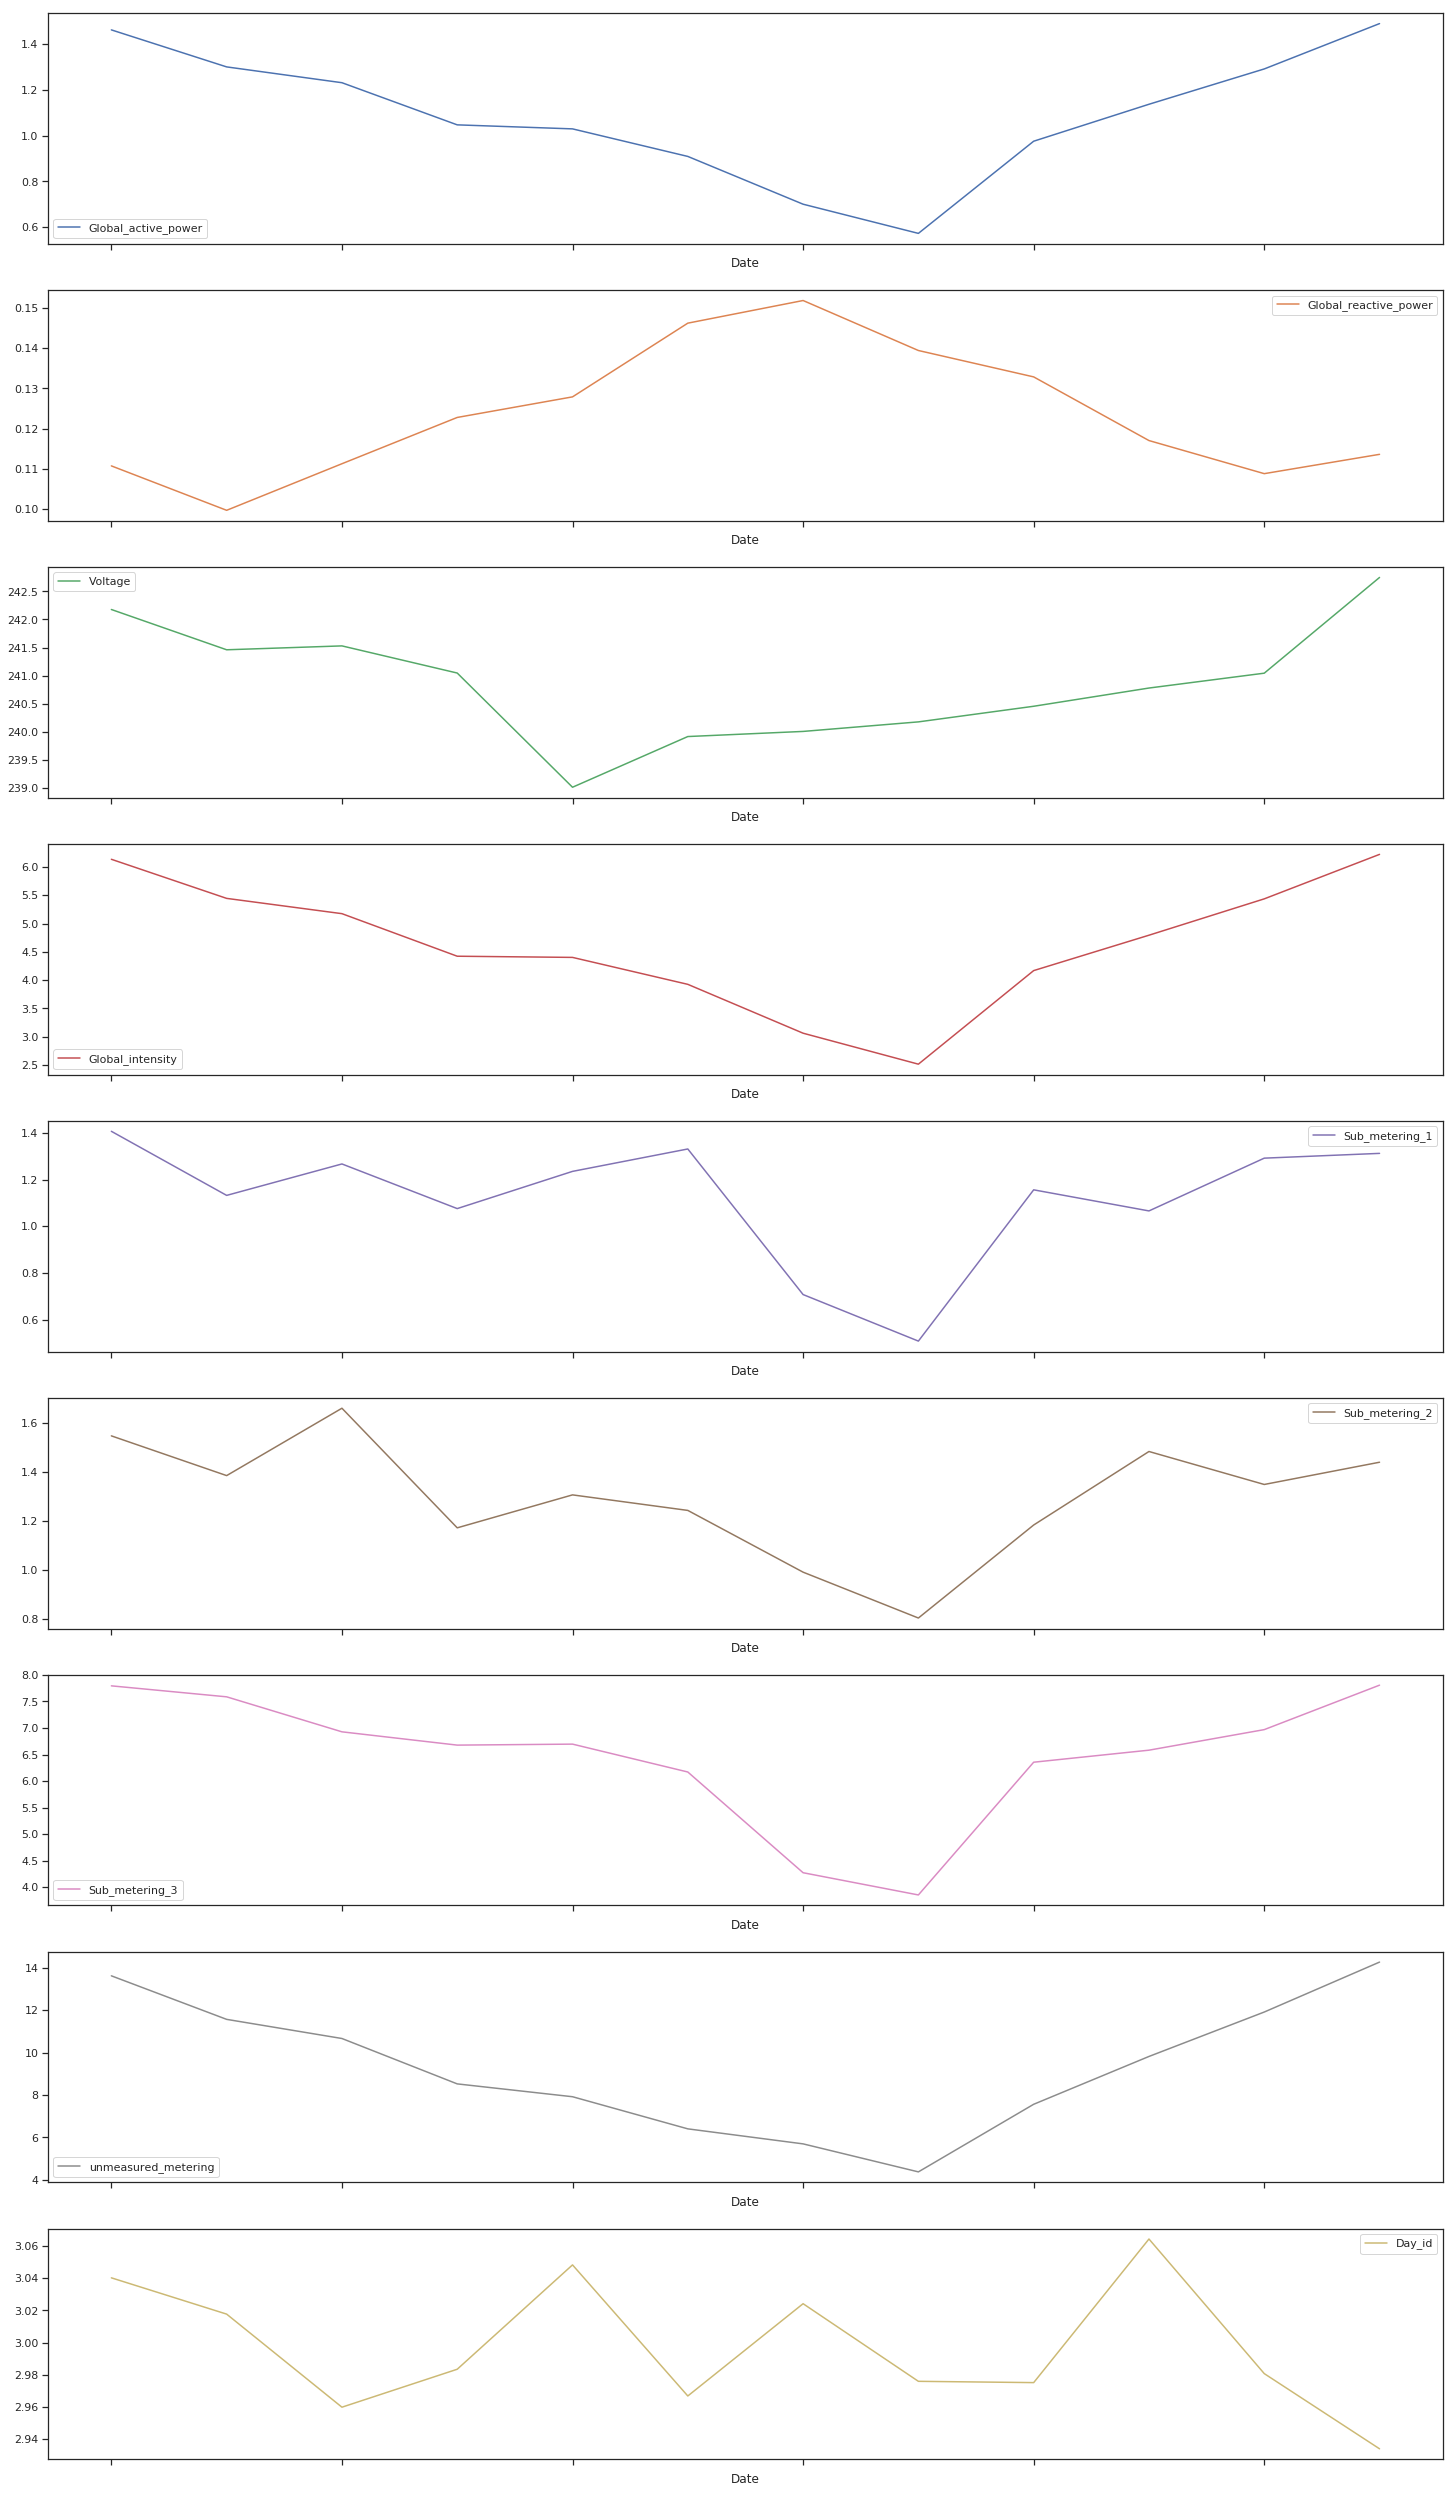

In [9]:
#change of variables with month

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


grouped_df=df.groupby(df['Date'].dt.strftime('%m')).mean().dropna()
#print(grouped_df.Sub_metering_3.unique())
#print(grouped_df.columns)
f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

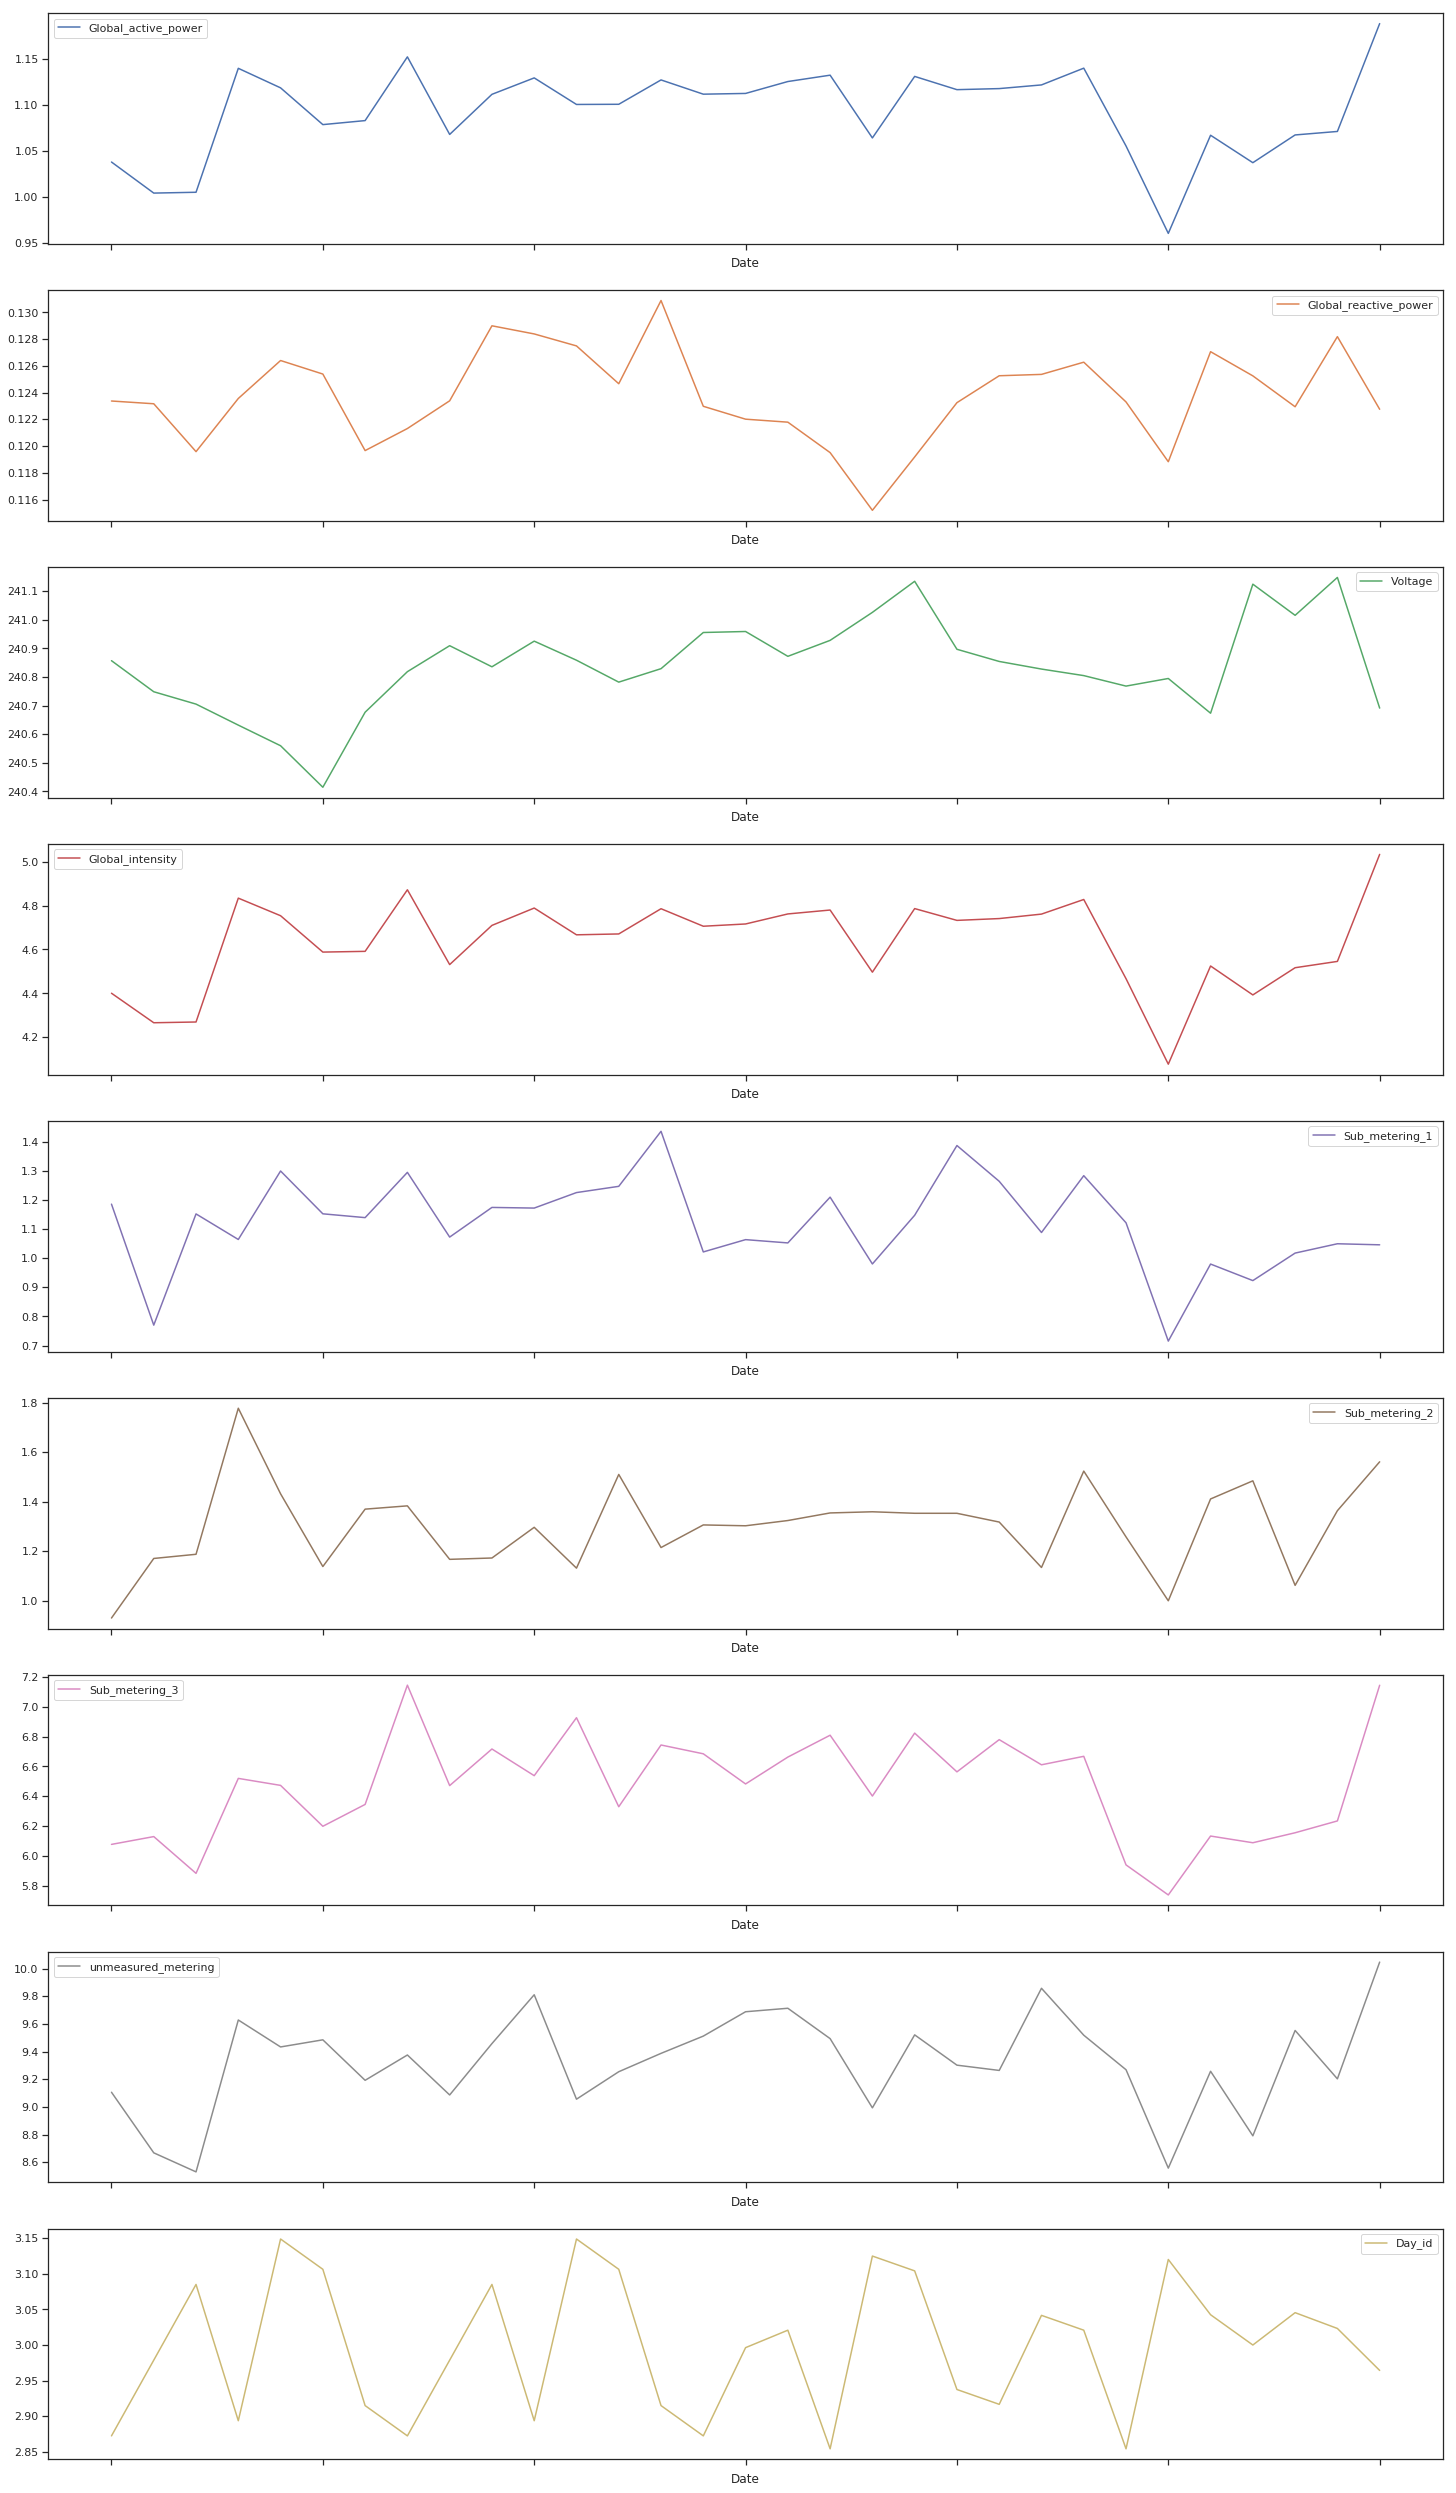

In [10]:
#change of variables with date

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


grouped_df=df.groupby(df['Date'].dt.strftime('%d')).mean().dropna()
#print(grouped_df.Sub_metering_3.unique())
#print(grouped_df.columns)
f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

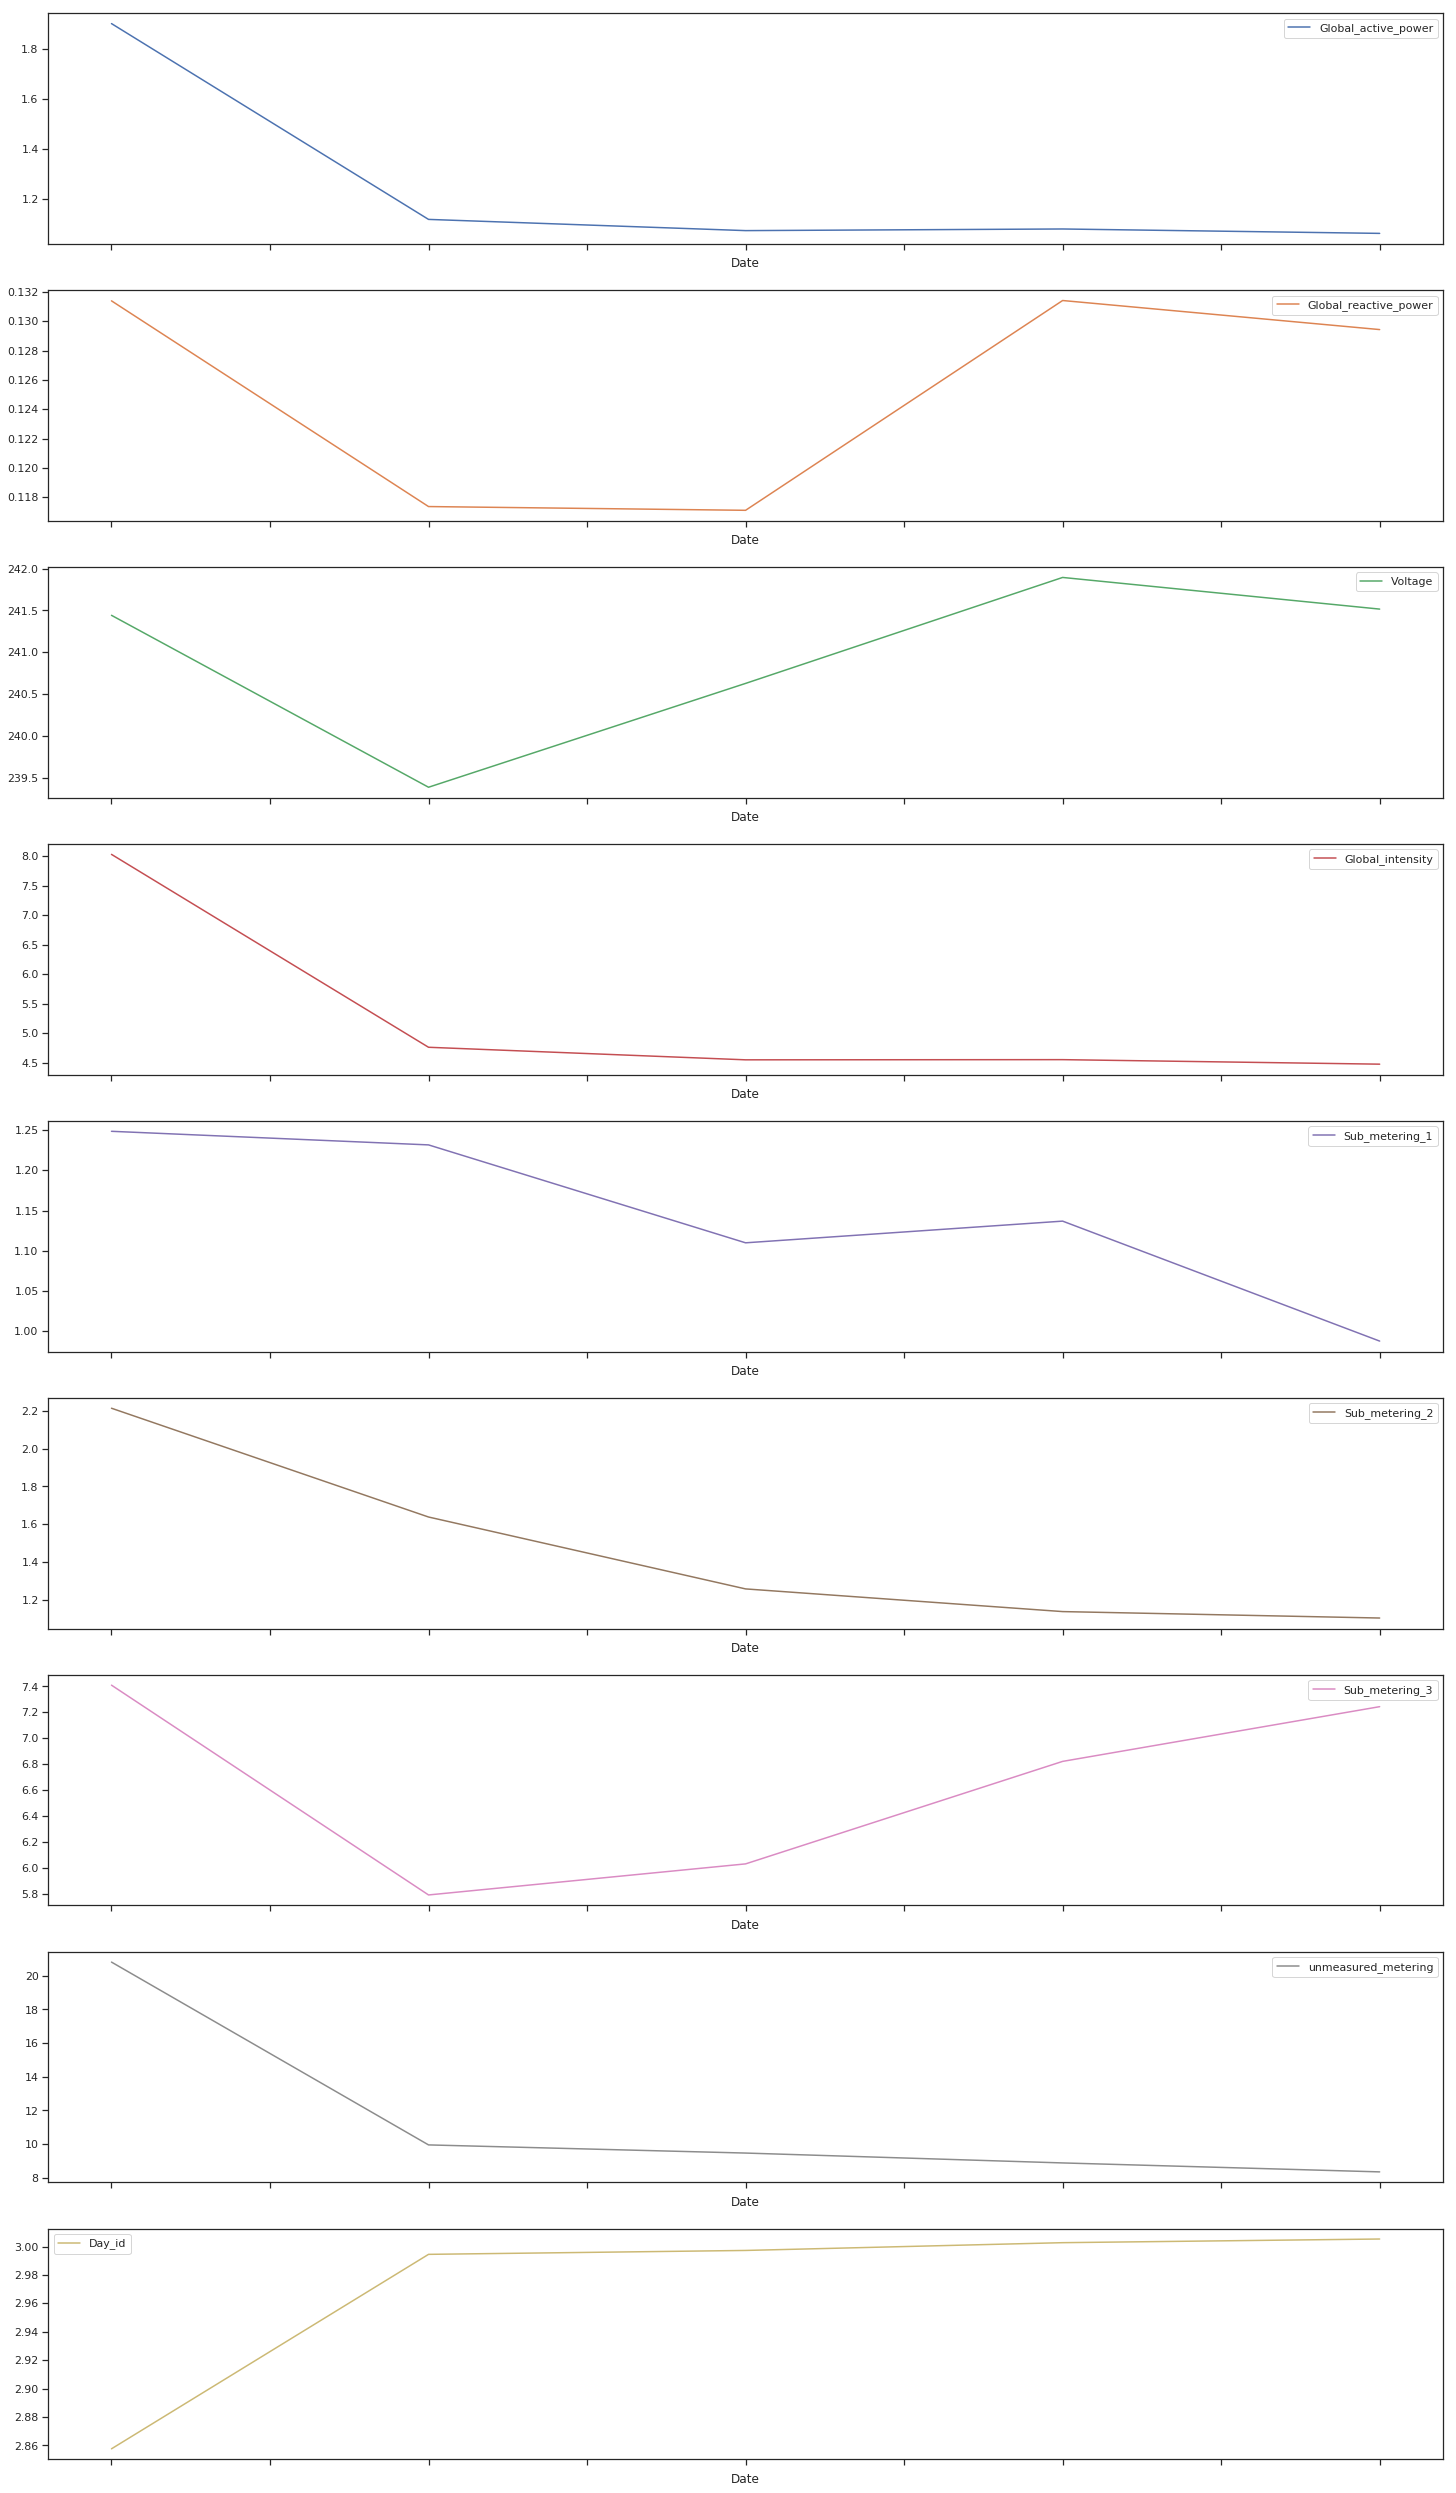

In [11]:
#change of variables with year (this might not be usable)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


grouped_df=df.groupby(df['Date'].dt.strftime('%Y')).mean().dropna()
#print(grouped_df.Sub_metering_3.unique())
#print(grouped_df.columns)
f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

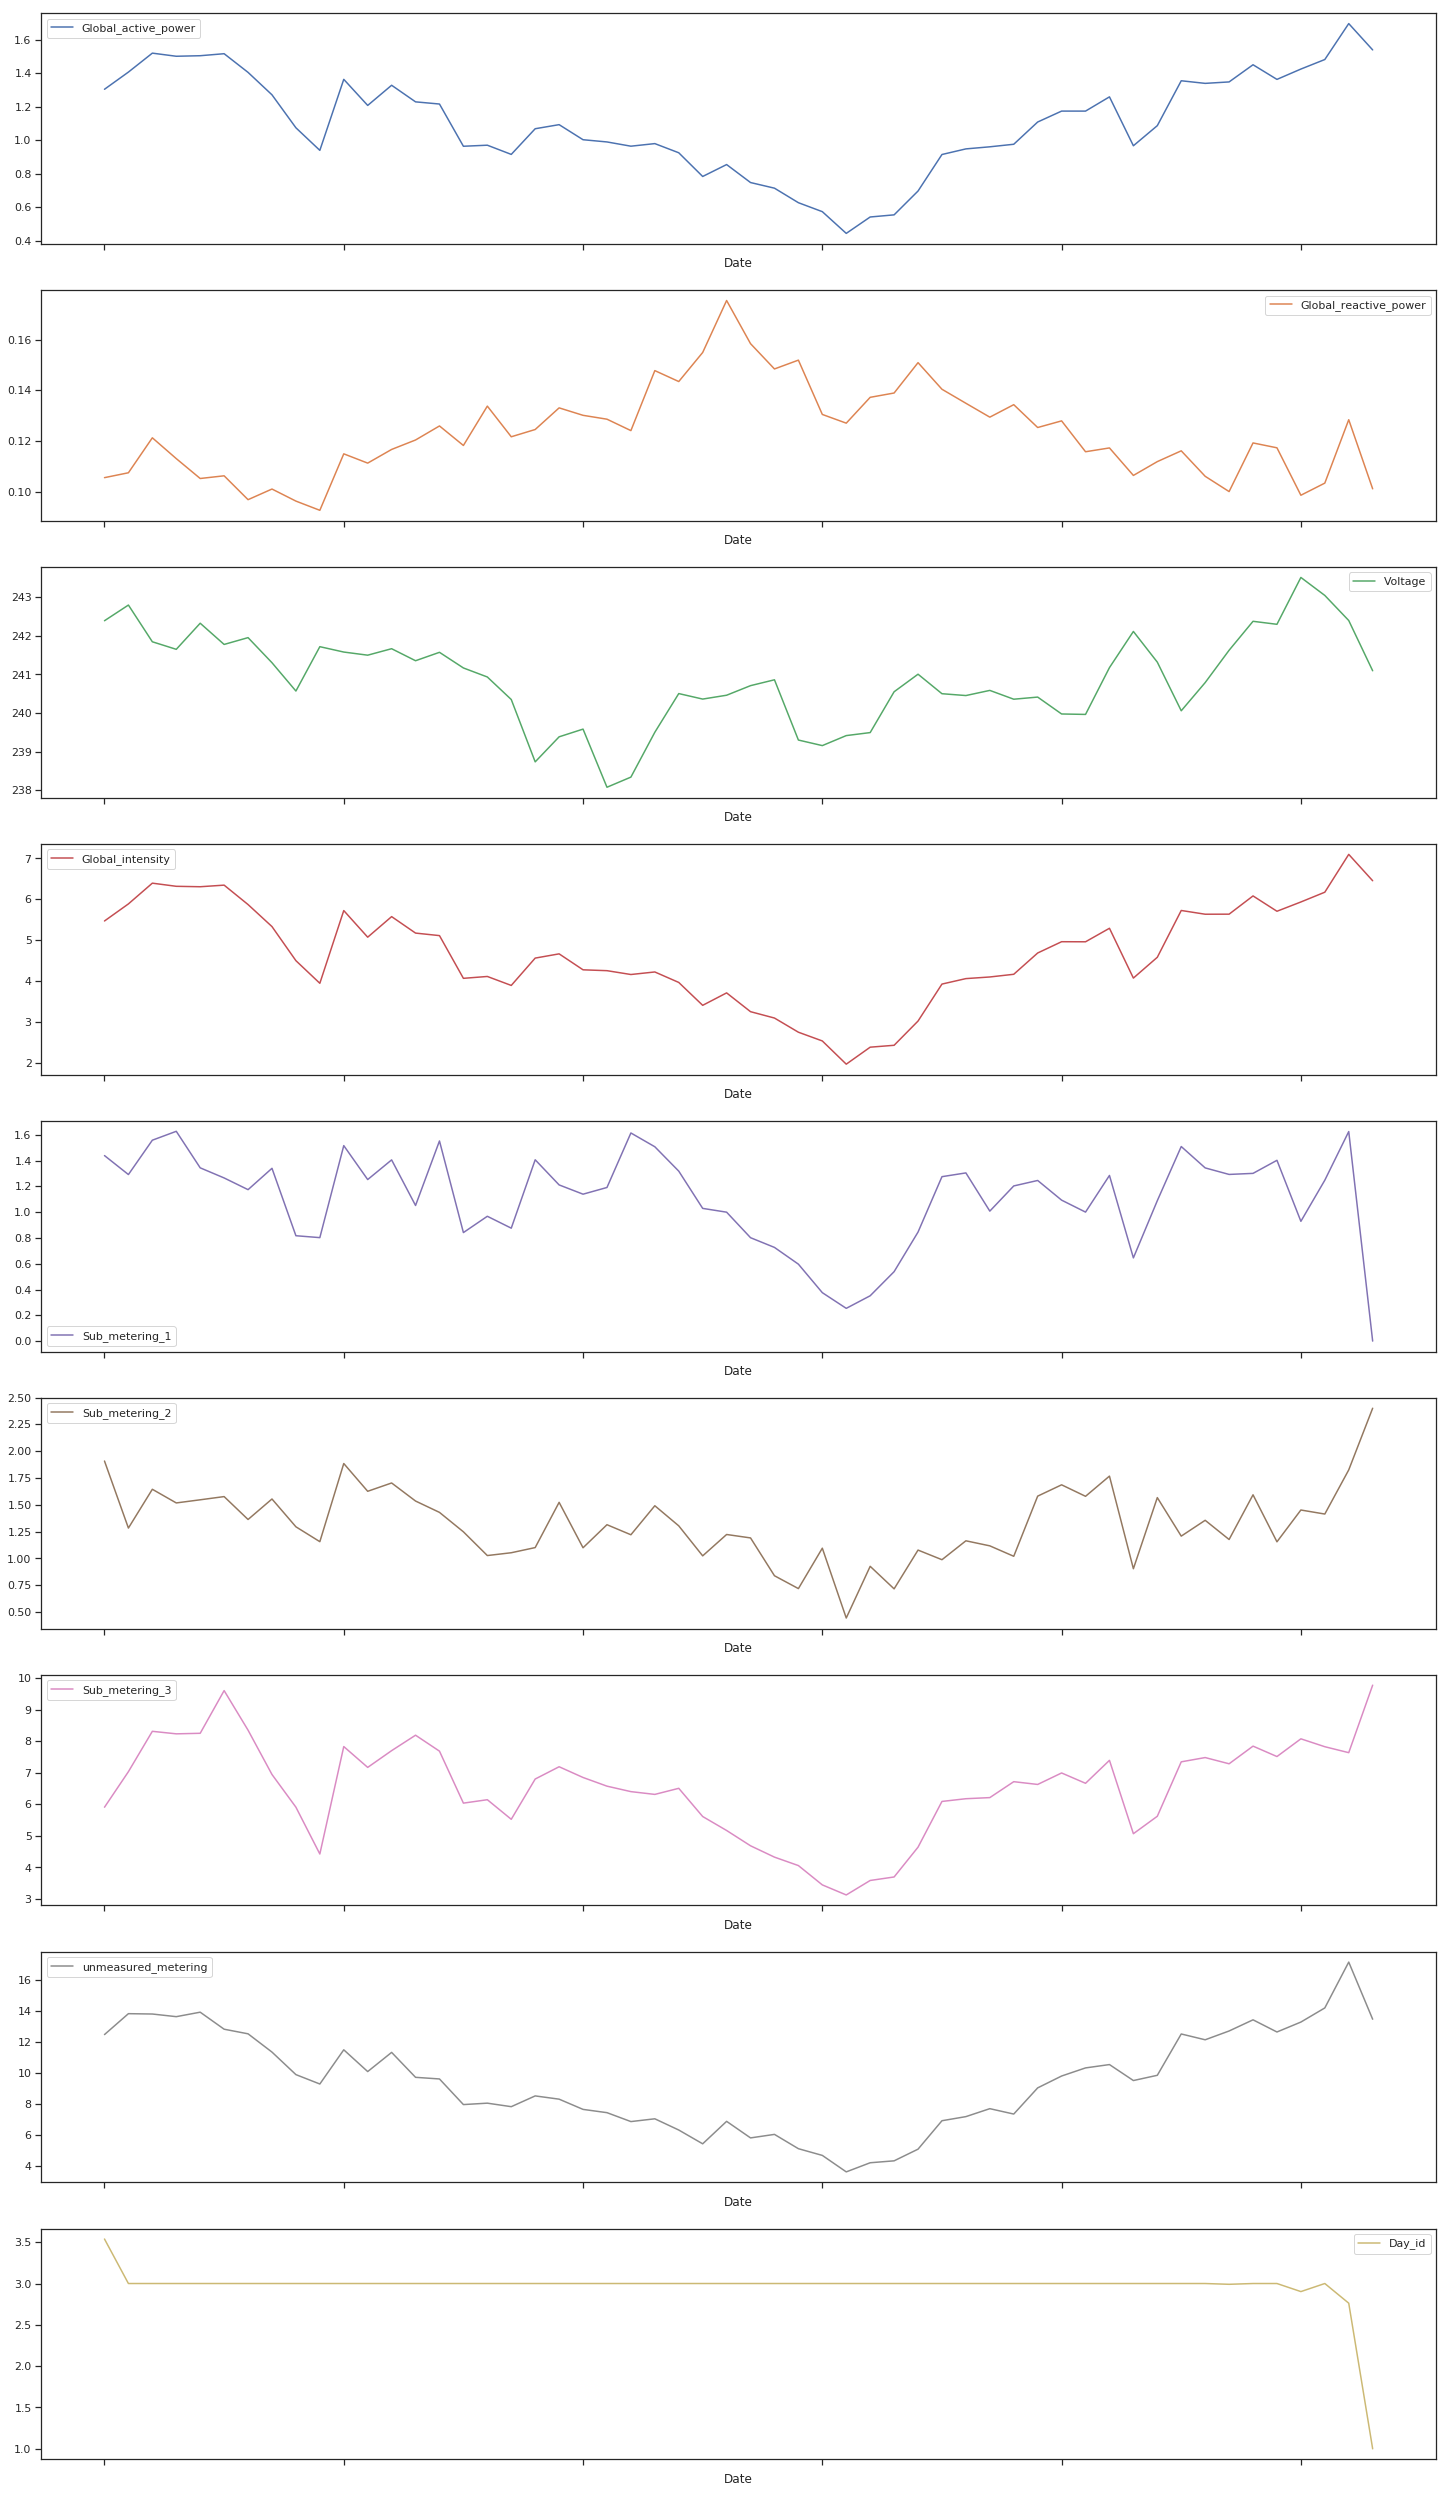

In [12]:
#change of variables with week

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


grouped_df=df.groupby(df['Date'].dt.strftime('%W')).mean().dropna()
#print(grouped_df.Sub_metering_3.unique())
#print(grouped_df.columns)
f, axs = plt.subplots(len(grouped_df.columns),1,figsize=(25,45))
grouped_df.plot(subplots=True,ax=axs)


plt.show()

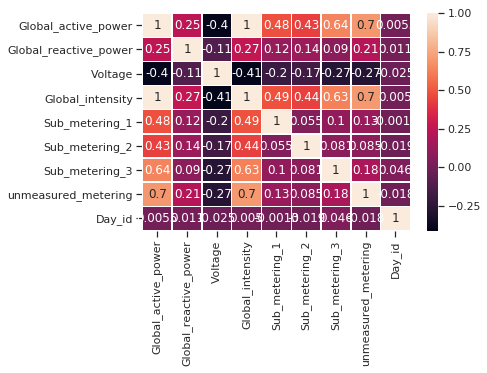

In [13]:

#correlation
#change of variables with year

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

sns.heatmap(df.corr(),linewidth=0.5,annot=True)
plt.show()

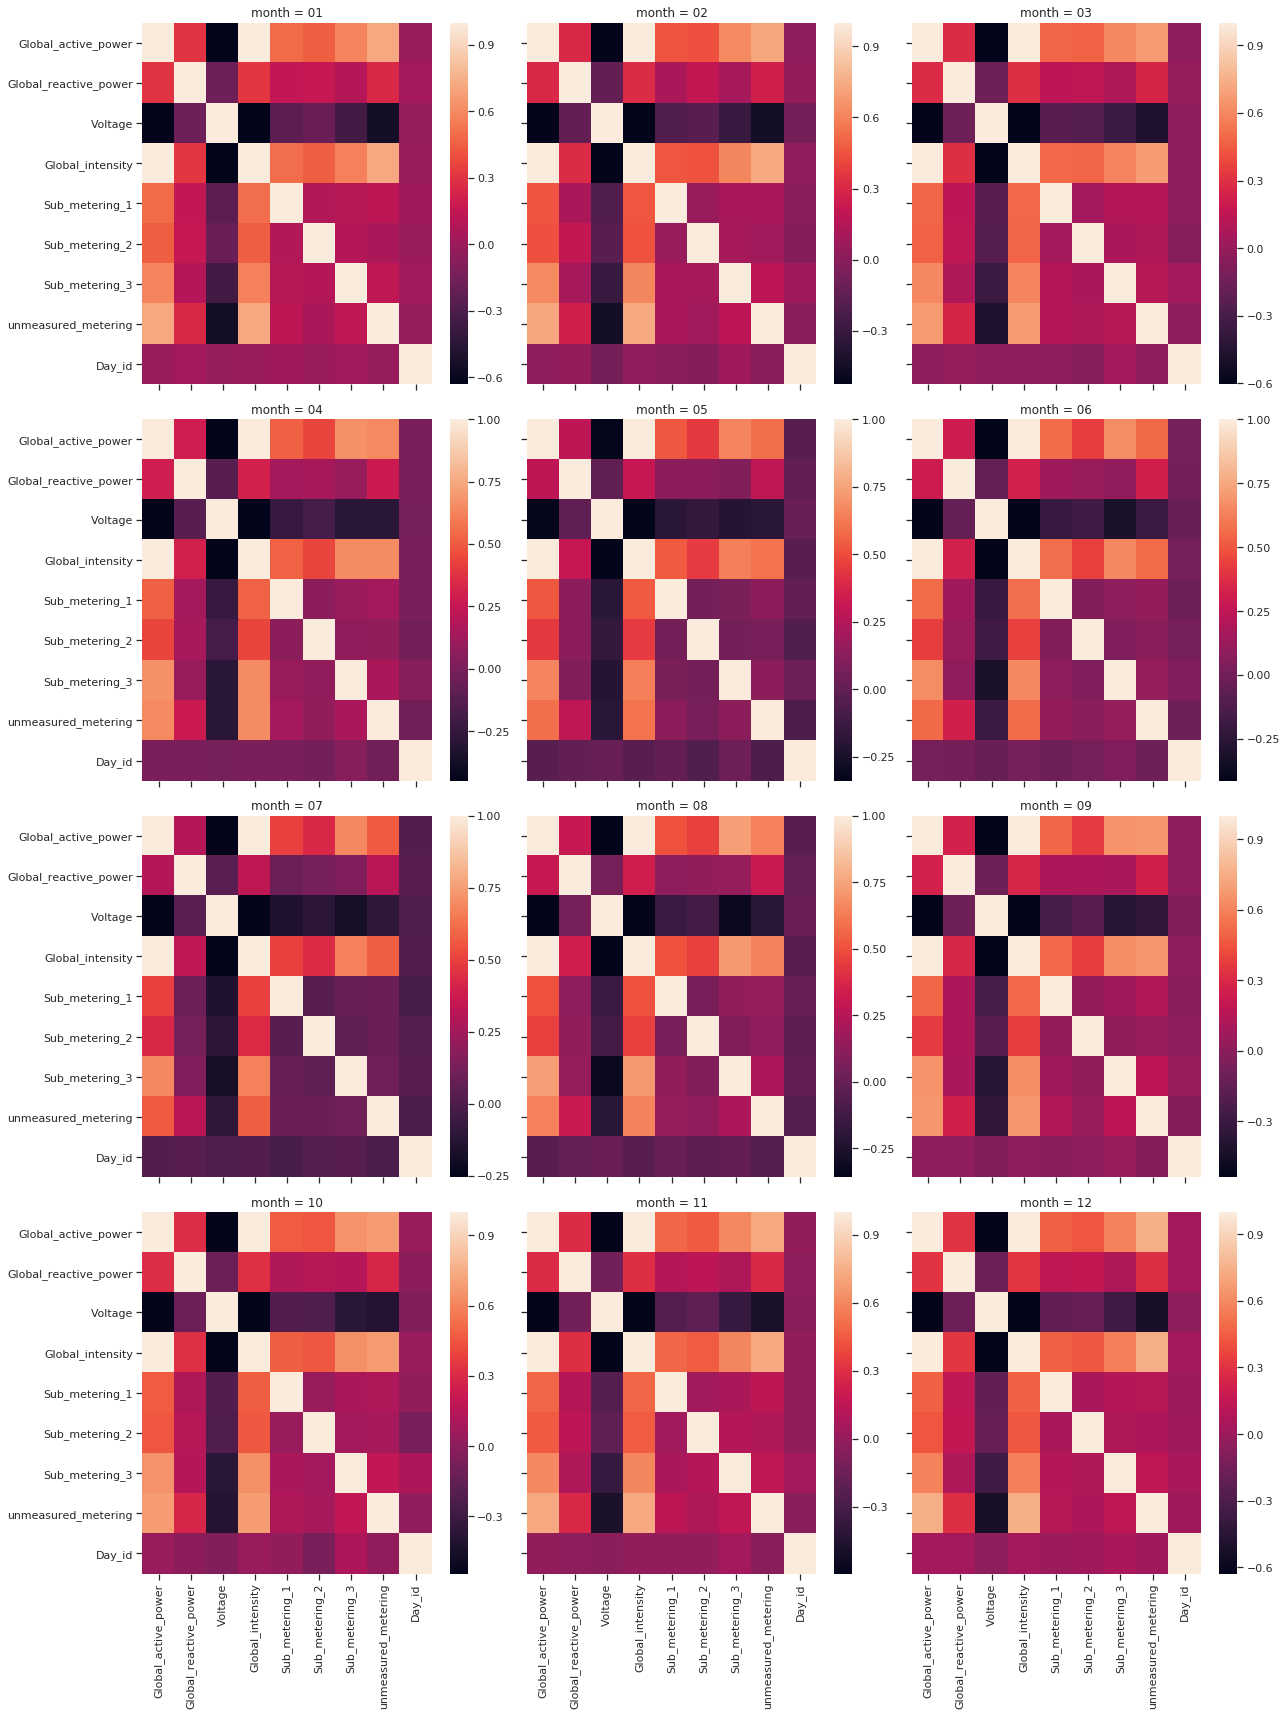

In [14]:
#plot month wise correlation plot

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

df['month']=df['Date'].dt.strftime("%m")
grouped_df=df.groupby(df['Date'].dt.strftime('%m'))

g=sns.FacetGrid(df,col="month", col_wrap=3,height=6)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0))

#print(grouped_df.groups)
#g=sns.FacetGrid(grouped_df,col="Date")
#g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=0))

